## Matplotlib Box Plots

In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\Booheymen\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Only get data analyst jobs 
df_DA_IN = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'India')].copy()

# Drop NaN values from the column for plotting
df_DA_IN = df_DA_IN.dropna(subset=['salary_year_avg'])

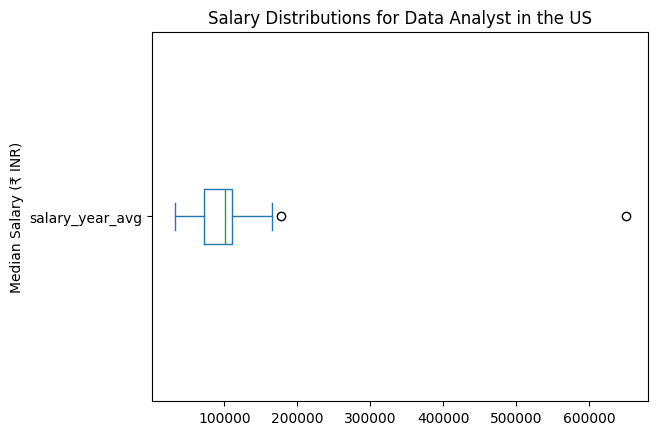

In [ ]:
df_DA_IN['salary_year_avg'].plot(kind='box', vert=False)
# Alternatively, you can use matplotlib
# plt.boxplot(df_DA_US['salary_year_avg'])

plt.title('Salary Distributions for Data Analyst in the India')
plt.ylabel('Median Salary (₹ INR)')
plt.show()

C:\Users\Booheymen\AppData\Local\Temp\ipykernel_2332\3563663309.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


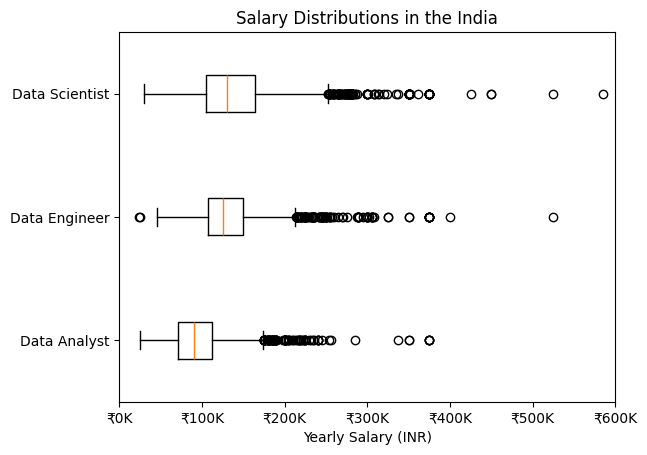

In [9]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

# filter for the job titles and country
df_IN = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].dropna(subset=['salary_year_avg'])

# list of salaries for each job title
job_list = [df_IN[df_IN['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title('Salary Distributions in the India')
plt.xlabel('Yearly Salary (INR)')
plt.xlim(0, 600000) 

# Format x-axis to show 'Thousands'
ticks_x = plt.FuncFormatter(lambda y, pos: f'₹{int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()